In [2]:
%load_ext autoreload
%autoreload 2

In [5]:
import pandas as pd
import numpy as np
from ipywidgets.widgets import HTML, Output, HBox, Button, Text
from IPython.display import display, clear_output
import json

import seaborn as sns
from transformers import AutoTokenizer, AutoModelForCausalLM, pipeline

In [ ]:
pipeline = pipeline('summarization')

In [6]:
hadms_to_dis_course = json.load(open('hadms_to_dis_course.json'))
hadms_to_hosp_course = json.load(open('hadms_to_hosp_course'))

In [35]:
model = 'EleutherAI/gpt-neo-1.3B'
tokenizer = AutoTokenizer.from_pretrained(model)

In [36]:
encoding = tokenizer(list(hadms_to_hosp_course.values()))

Token indices sequence length is longer than the specified maximum sequence length for this model (6086 > 2048). Running this sequence through the model will result in indexing errors


In [37]:
lens = [len(encoding[e]) for e in range(len(encoding['input_ids']))]

In [54]:
# drop tok lens over 43k
sample_lens = [len(encoding[e]) for e in range(len(encoding['input_ids'])) if len(encoding[e]) < 10000]

In [55]:
len(sample_lens) / len(lens)

0.8632353861233343

In [56]:
np.histogram(sample_lens, bins=10)

(array([15168,  9135,  5560,  3561,  2326,  1744,  1336,  1002,   851,
          710]),
 array([6.0000e+00, 1.0053e+03, 2.0046e+03, 3.0039e+03, 4.0032e+03,
        5.0025e+03, 6.0018e+03, 7.0011e+03, 8.0004e+03, 8.9997e+03,
        9.9990e+03]))

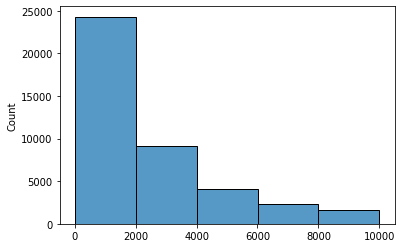

In [57]:
sns.histplot(sample_lens, stat='count', bins=5)